# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [87]:
from scipy import stats 
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency

import numpy as np
import pandas as pd
import seaborn as sns

In [64]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])
sample_size =  15
#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.



In [78]:

print('Mean of GPU1 is ' , np.mean(GPU1))
print('Mean of GPU2 is ' , np.mean(GPU2))

## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_GPU1 = GPU1.var(ddof=1)
var_GPU2 = GPU2.var(ddof=1)

print('Variance of GPU1 is ' , var_GPU1)
print('Variance of GPU2 is ' , var_GPU2)

#std deviation
stddev_GPU = np.sqrt((var_GPU1 + var_GPU2)/2)
print('Standard Deviation is ' , stddev_GPU)

## Calculate the t-statistics
t = (GPU1.mean() - GPU2.mean())/(stddev_GPU * np.sqrt(2/sample_size))
print('t-statistic is ' , t)

## Compare with the critical t-value
#Degrees of freedom
df = 2* sample_size - 2
print('degrees of freedom is ' , df)

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

print("t = " + str(t))
print("p = " + str(2*p))
print('Alternate Hypothesis is correct')


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(GPU1,GPU2)
print("t = " + str(t2))
print("p = " + str(p2))


Mean of GPU1 is  10.333333333333334
Mean of GPU2 is  11.466666666666667
Variance of GPU1 is  1.3809523809523807
Variance of GPU2 is  1.4095238095238096
Standard Deviation is  1.1812019705529173
t-statistic is  -2.6276295134718395
degrees of freedom is  28
t = -2.6276295134718395
p = 1.9862057179585473
Alternate Hypothesis is correct
t = -2.627629513471839
p = 0.013794282041452725


## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

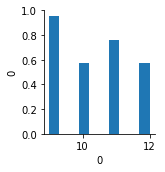

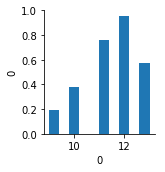

In [66]:
x = pd.DataFrame(GPU1)
y = pd.DataFrame(GPU2)

sns.pairplot(data=x)
sns.pairplot(data=y)


In [88]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)  

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

y_train = scaler.transform(y_train)  
y_test = scaler.transform(y_test)  
print("X Train")
print(X_train)
print("X Test")
print(X_test)

print("Y Train")
print(y_train)
print("Y Test")
print(y_test)

X Train
[[ 1.27063966]
 [ 1.27063966]
 [-0.52320456]
 [ 0.37371755]
 [ 1.27063966]
 [ 0.37371755]
 [-0.52320456]
 [-1.42012668]
 [ 0.37371755]
 [-1.42012668]
 [-1.42012668]
 [ 0.37371755]]
X Test
[[-1.42012668]
 [-0.52320456]
 [-1.42012668]]
Y Train
[[-1.42012668]
 [ 1.27063966]
 [ 0.37371755]
 [ 2.16756177]
 [ 1.27063966]
 [ 1.27063966]
 [ 1.27063966]
 [ 2.16756177]
 [ 1.27063966]
 [ 0.37371755]
 [ 2.16756177]
 [ 0.37371755]]
Y Test
[[-0.52320456]
 [-0.52320456]
 [ 0.37371755]]


In [68]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Unknown label type: 'continuous'

## Question 3

He is trying a third GPU - GPU3.

In [89]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [83]:
print(GPU3)
t3, p3 = stats.ttest_ind(GPU1,GPU3)
print("t = " + str(t3))
print("p = " + str(p3))

[ 9 10  9 11 10 13 12  9 12 12 13 12 13 10 11]
t = -1.4988943759093303
p = 0.14509210993138993


## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [90]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

In [92]:
tstat, pval = stats.levene(e1,e2,e3)
print('t-statistic is ' , tstat)
print('p value is ' , pval)
print("Since the p value is above the alpha value, null hypothesis cannot be rejected")

t-statistic is  2.6741725711150446
p value is  0.12259792666001798
Since the p value is above the alpha value, null hypothesis cannot be rejected


## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

In [97]:
print(stats.f_oneway(e1,e2,e3))
print("oneway ANOVA test shows that pvalue is greater than alpha. null hypothesis cannot be rejected.")

F_onewayResult(statistic=2.51357622845924, pvalue=0.13574644501798466)
oneway ANOVA test shows that pvalue is greater than alpha. null hypothesis cannot be rejected.


## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

In [99]:
print("TYPE 1 ERROR : FALSE POSITIVE ERROR - This happens when null hypothesis is TRUE but is falsely rejected by the test ")
print("TYPE 2 ERROR : TRUE NEGATIVE ERROR - This happens when null hypothesis is FALSE but is NOT rejected by the test ")

TYPE 1 ERROR : FALSE POSITIVE ERROR - This happens when null hypothesis is TRUE but is falsely rejected by the test 
TYPE 2 ERROR : TRUE NEGATIVE ERROR - This happens when null hypothesis is FALSE but is NOT rejected by the test 


## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


In [102]:
print("NULL HYPOTHESIS - increase in waiting time compared to previous measurement month ago.")
print("ALTERNATE HYPOTHESIS - No increase in waiting time compared to previous measurement month ago.")


NULL HYPOTHESIS - increase in waiting time compared to previous measurement month ago.
ALTERNATE HYPOTHESIS - No increase in waiting time compared to previous measurement month ago.


## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [103]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [107]:
chi2_stat , p_val, df , cont = chi2_contingency(dice)
print("chi2_stat value is", chi2_stat)
print("p_val value is", p_val)
print("df value is", df)
print("cont value is", cont)

chi2_stat , p_val, df , cont = chi2_contingency(dice ,lambda_="log-likelihood")
print("chi2_stat value is", chi2_stat)
print("p_val value is", p_val)
print("df value is", df)
print("cont value is", cont)

chi2_stat value is 23.315671914716496
p_val value is 0.07766367301496693
df value is 15
cont value is [[ 5.57419355  8.20645161  5.57419355  4.64516129]
 [ 6.50322581  9.57419355  6.50322581  5.41935484]
 [ 6.73548387  9.91612903  6.73548387  5.61290323]
 [ 6.96774194 10.25806452  6.96774194  5.80645161]
 [ 5.34193548  7.86451613  5.34193548  4.4516129 ]
 [ 4.87741935  7.18064516  4.87741935  4.06451613]]
chi2_stat value is 25.19076738204805
p_val value is 0.04743937543013587
df value is 15
cont value is [[ 5.57419355  8.20645161  5.57419355  4.64516129]
 [ 6.50322581  9.57419355  6.50322581  5.41935484]
 [ 6.73548387  9.91612903  6.73548387  5.61290323]
 [ 6.96774194 10.25806452  6.96774194  5.80645161]
 [ 5.34193548  7.86451613  5.34193548  4.4516129 ]
 [ 4.87741935  7.18064516  4.87741935  4.06451613]]


## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [121]:
print("Z Score without ddof")
print(stats.zscore(dice))
#print("Z Score with ddof")
#print(stats.zscore(dice,axis=1, ddof=1))

zscore = stats.zscore(dice)
pval = stats.norm.sf(abs(zscore))
print(pval)

pval = stats.norm.cdf(abs(zscore))
print(pval)


Z Score without ddof
[[-0.46291005 -0.18884739 -1.83711731  1.44115338]
 [ 1.38873015 -0.64208114  1.22474487  0.        ]
 [ 0.9258201   0.7176201   0.61237244 -1.44115338]
 [-0.9258201   1.62408759  0.61237244 -0.96076892]
 [-1.38873015  0.03776948  0.          0.        ]
 [ 0.46291005 -1.54854863 -0.61237244  0.96076892]]
[[0.32171442 0.42510621 0.03309629 0.07477068]
 [0.08245741 0.26041025 0.11033568 0.5       ]
 [0.17726974 0.23649578 0.27014569 0.07477068]
 [0.17726974 0.05217856 0.27014569 0.16833418]
 [0.08245741 0.48493574 0.5        0.5       ]
 [0.32171442 0.06074513 0.27014569 0.16833418]]
[[0.67828558 0.57489379 0.96690371 0.92522932]
 [0.91754259 0.73958975 0.88966432 0.5       ]
 [0.82273026 0.76350422 0.72985431 0.92522932]
 [0.82273026 0.94782144 0.72985431 0.83166582]
 [0.91754259 0.51506426 0.5        0.5       ]
 [0.67828558 0.93925487 0.72985431 0.83166582]]


## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [122]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.